means we apply any matmatical formula to colums and we transform into something else....in this have log  , reciprocal  power , box cox , yeo johnson...

## our data distribtion or probability density function will convert into
## normal function or normal distribution....

## **FUNCTIONAL TRANSFORMER**

**TO KNOW DATA IS NORMAL OR NOT**

1. Seabon displot will teel
2. or call pandas skwed ..pd.skew ...if giving 0 then normal
or negative positive then it is right..
3. qq plot will ...se to net

**LOG TRANSFORM**

FOR MORE INSIGHTS GO TO THE NOTES OF ML COPY.... STATICS PORTION OF
LOG TRANSFORMER BY CAMPUS X ....

**titanics without transform accuracy check::**

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer



here we are using only 3 coloumn

In [ ]:
v = pd.read_csv('/content/train.csv' , usecols = ['Age' ,'Fare', 'Survived'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
v.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

 **to check  missing values**

In [ ]:
v.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

here age have missing value ...we would replace it by mean...

In [ ]:
v['Age'].fillna(v['Age'].mean(), inplace=True)

/tmp/ipython-input-173-1215880702.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  v['Age'].fillna(v['Age'].mean(), inplace=True)


In [ ]:
v.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

by above function fillna... which is function of pandas we have removed missing
value by the mean value...we have checked through null function

In [ ]:
v.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [ ]:
# extracting x and y coulumn for  training  x any y
x = v.iloc[: , 1:3]
y = v.iloc[: , 0]

**gonna do train test split**

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

/tmp/ipython-input-178-3239493082.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


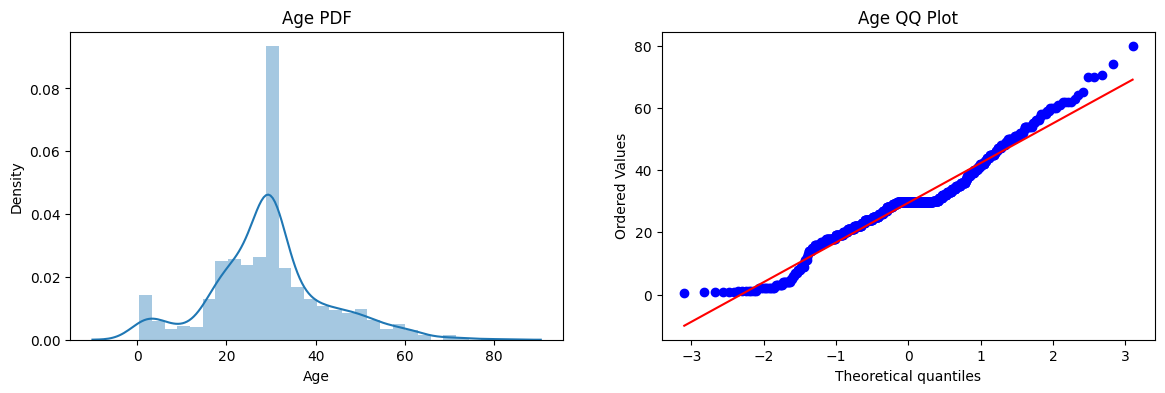

In [ ]:
plt.figure(figsize = (14 , 4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'] , dist = 'norm' , plot = plt)
plt.title('Age QQ Plot')

plt.show()

by upper figure! we could say that almost its normally ditsributed....

now lets checkl fare column

/tmp/ipython-input-179-3850964153.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


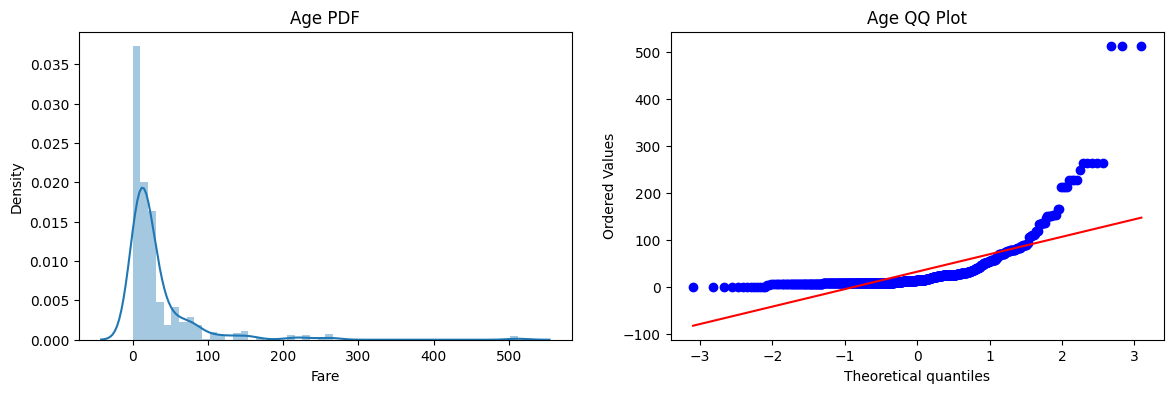

In [ ]:
plt.figure(figsize = (14 , 4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'] , dist = 'norm' , plot = plt)
plt.title('Age QQ Plot')

plt.show()

by theretical quantilees we could this is not normally distributed

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(x_train , y_train)
clf2.fit(x_train , y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)




print("accuracy LR" , accuracy_score(y_test , y_pred)*100)
print("accuracy DT" , accuracy_score(y_test , y_pred1)*100)

accuracy LR 64.80446927374301
accuracy DT 67.59776536312849


In [ ]:
import pandas as pd

# Logistic Regression Prediction (clf1)
y_pred1 = clf.predict(x_test)

# Random Forest Prediction (clf2)
y_pred2 = clf2.predict(x_test)

# Save clf1 prediction to pre1.csv
df1 = pd.DataFrame({'Prediction': y_pred1})
df1.to_csv('pre1.csv', index=False)

# Save clf2 prediction to pre2.csv
df2 = pd.DataFrame({'Prediction': y_pred2})
df2.to_csv('pre2.csv', index=False)

print("✅ pre1.csv (Logistic) and pre2.csv (Random Forest) created successfully.")


✅ pre1.csv (Logistic) and pre2.csv (Random Forest) created successfully.


In [ ]:
# File me likho
with open("accuracy.txt", "w") as f:
    f.write("Accuracy LR: {:.2f}%\n".format(acc_lr))
    f.write("Accuracy DT: {:.2f}%\n".format(acc_dt))

print("✅ Accuracy saved to accuracy.txt")


✅ Accuracy saved to accuracy.txt
